<a href="https://colab.research.google.com/github/Junjaee/Study/blob/main/MachineLearning_DeepLearning/Study/04_SupprtVectorMachine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib as mpl
import matplotlib.font_manager as fm
fm.FontProperties(fname = "맑은 고딕")
mpl.rcParams["axes.unicode_minus"] = False # 음수표시

import seaborn as sns

import mglearn
from sklearn.datasets import load_breast_cancer, load_boston, load_iris, make_moons, load_digits, load_wine, load_diabetes, make_blobs

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import model_selection
from sklearn import metrics
from sklearn.svm import SVR, SVC, LinearSVR, LinearSVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
import xgboost as xgb
# conda install -c anaconda py-xgboost
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance, plot_tree
from lightgbm import LGBMClassifier, LGBMRegressor, plot_importance, plot_metric, plot_tree
import lightgbm as lgb

import multiprocessing
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.manifold import TSNE

import graphviz

In [1]:
pip install mglearn

     |████████████████████████████████| 542kB 4.0MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=473589675e2888ed30db32f9cf46192896d5c2dae5513470680e36c7bc61cd4d
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [2]:
# 한글 깨짐 방지를 위한 나눔 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,008 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160815 files and d

In [2]:
# 폰트 적용
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

- 회귀, 분류 이상치 탐지 등에 사용되는 지도 학습 방법
- 클래스 사이의 경계에 위치한 데이터 포인터를 서포트 벡터라고 한다.
- 각 서포트 벡터가 클래스 사이의 결정 경계를 구분하는 데 얼마나 중요한지를 학습
- 각 서포트 벡터 사이의 마진이 가장 큰 방향으로 학습
- 서포트 벡터까지의 거리와 서포트 벡터의 중요도를 기반으로 예측을 수행
- 관련 클래스
    - 회귀, 분류 : SVR, SVC
    - 선형, 비선형 : LinearSVC, LinearSVR, KernelSVC, KernelSVR

# 커널 기법

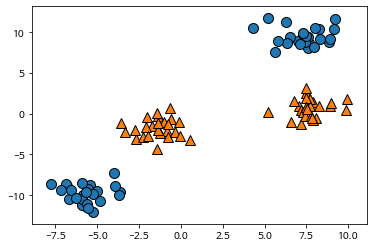

In [16]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=4, random_state=8)
y = y%2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


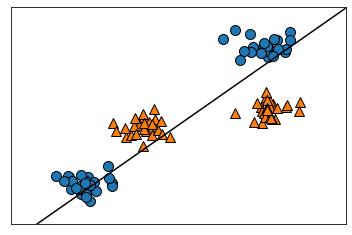

In [19]:
linear_svm = LinearSVC().fit(X, y)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
mglearn.plots.plot_2d_separator(linear_svm, X)

Text(0.5, 0, '특성1 ** 2')

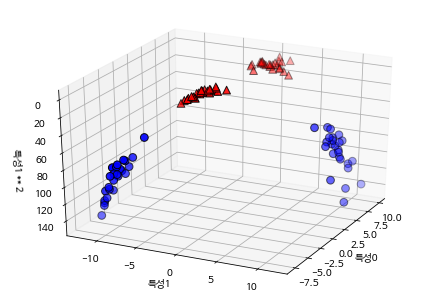

In [20]:
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)

mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60,  edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', 
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, '특성1 ** 2')

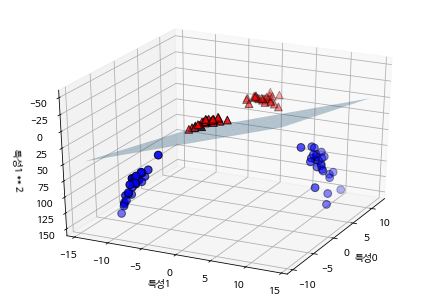

In [21]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# 선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60,  edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', 
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

Text(0, 0.5, '특성 1')

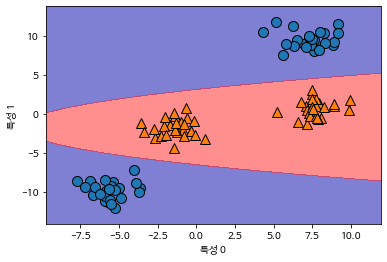

In [22]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], 
            cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

# 하이퍼 파리미터
- cost
    - decision boundary와 마진의 가격을 어느정도로 할지 결정
    - cost가 작으면 마진은 넓어진다

- gamma
    - 훈련 데이터 하나 당 영향을 끼치는 범위를 조절하는 변수
    - gamma가 작을 경우 영향을 끼치는 범위가 넓어진다

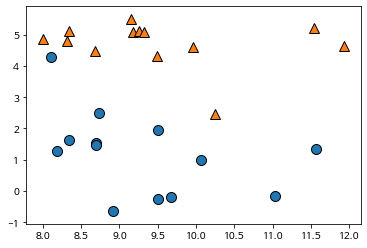

In [24]:
X, y = mglearn.tools.make_handcrafted_dataset()

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [25]:
svm = SVC(kernel="rbf", C=10, gamma=0.1).fit(X, y)

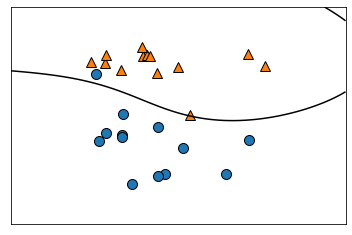

In [26]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
mglearn.plots.plot_2d_separator(svm, X)

In [28]:
sv = svm.support_vectors_

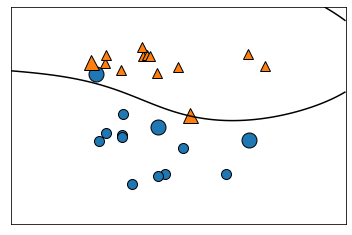

In [29]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
mglearn.plots.plot_2d_separator(svm, X)

sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15)


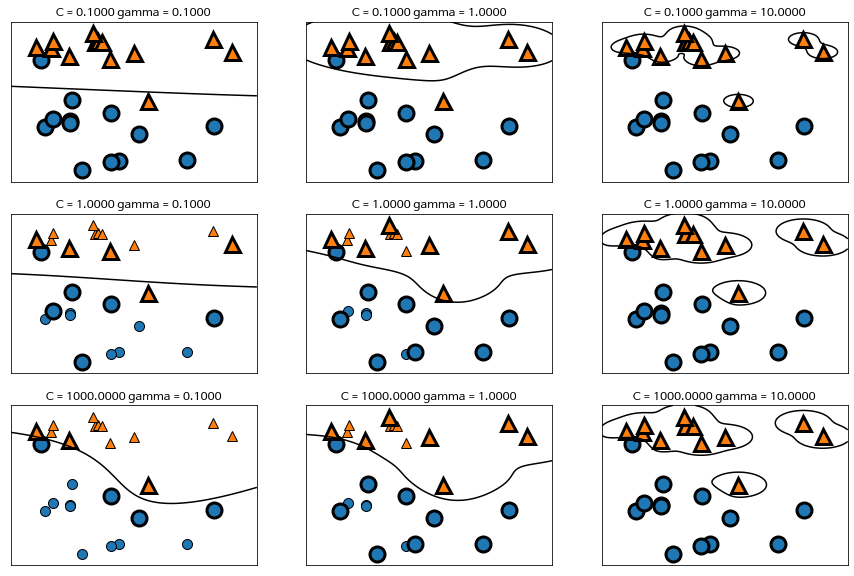

In [37]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C = C, log_gamma = gamma, ax=a)

# 3. SVM 클래스의 종류

In [38]:
import multiprocessing
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.manifold import TSNE

### (1) 회귀 모델과 분류 모델

#### 1) 회귀 모델 (SVR)

In [39]:
X, y = load_boston(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

model = SVR()
model.fit(X_train, y_train)

print("학습 결과 :", model.score(X_train, y_train))
print("테스트 결과 :", model.score(X_test, y_test))

학습 결과 : 0.2177283706374875
테스트 결과 : 0.13544178468518187


#### 2) 분류 모델(SVC)

In [41]:
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

model = SVC()
model.fit(X_train, y_train)

print("학습 결과 :", model.score(X_train, y_train))
print("테스트 결과 :", model.score(X_test, y_test))

학습 결과 : 0.9014084507042254
테스트 결과 : 0.9230769230769231


### (2) 커널 기법
- 입력 데이터를 고차원 공간에 사상해서 비선형 특징을 하습할 수 있도록 확장하는 방법
- scikit-learn에서는 Linear, Polynomial, RBF(Radial Basis Function) 등 다양한 커널기법을 지원

In [43]:
##### 회귀 모델에서 확인

X, y = load_boston(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

linear_svr = SVR(kernel="linear")
linear_svr.fit(X_train, y_train)

print("linear_svr 학습 결과 :", linear_svr.score(X_train, y_train))
print("linear_svr 테스트 결과 :", linear_svr.score(X_test, y_test))

polynomial_svr = SVR(kernel="poly")
polynomial_svr.fit(X_train, y_train)

print("polynomial_svr 학습 결과 :", polynomial_svr.score(X_train, y_train))
print("polynomial_svr 테스트 결과 :", polynomial_svr.score(X_test, y_test))

rbf_svr = SVR(kernel="rbf")
rbf_svr.fit(X_train, y_train)

print("rbf_svr 학습 결과 :", rbf_svr.score(X_train, y_train))
print("rbf_svr 테스트 결과 :", rbf_svr.score(X_test, y_test))

linear_svr 학습 결과 : 0.715506620496448
linear_svr 테스트 결과 : 0.6380398541506058
polynomial_svr 학습 결과 : 0.2024454261446289
polynomial_svr 테스트 결과 : 0.133668450367462
rbf_svr 학습 결과 : 0.2177283706374875
rbf_svr 테스트 결과 : 0.13544178468518187


In [44]:
##### 분류 모델에서 확인

X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

linear_svc = SVC(kernel="linear")
linear_svc.fit(X_train, y_train)

print("linear_svc 학습 결과 :", linear_svc.score(X_train, y_train))
print("linear_svc 테스트 결과 :", linear_svc.score(X_test, y_test))

polynomial_svc = SVC(kernel="poly")
polynomial_svc.fit(X_train, y_train)

print("polynomial_svc 학습 결과 :", polynomial_svc.score(X_train, y_train))
print("polynomial_svc 테스트 결과 :", polynomial_svc.score(X_test, y_test))

rbf_svc = SVC(kernel="rbf")
rbf_svc.fit(X_train, y_train)

print("rbf_svc 학습 결과 :", rbf_svc.score(X_train, y_train))
print("rbf_svc 테스트 결과 :", rbf_svc.score(X_test, y_test))

linear_svc 학습 결과 : 0.960093896713615
linear_svc 테스트 결과 : 0.986013986013986
polynomial_svc 학습 결과 : 0.9014084507042254
polynomial_svc 테스트 결과 : 0.9230769230769231
rbf_svc 학습 결과 : 0.9014084507042254
rbf_svc 테스트 결과 : 0.9230769230769231


### (3) 매개변수 튜닝
- SVM은 사용하는 커널에 따라 다양한 매개변수 설정 가능
- 매개변수를 변경하면서 성능 변화를 관찰

In [45]:
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [57]:
polynomial_svc = SVC(kernel="poly", degree=2, C=0.1, gamma="auto")
polynomial_svc.fit(X_train, y_train)

print("kernel=poly, degree={}, C={}, gamma={}".format(2, 0.1, "auto"))
print("polynomial_svc 학습 결과 :", polynomial_svc.score(X_train, y_train))
print("polynomial_svc 테스트 결과 :", polynomial_svc.score(X_test, y_test))

kernel=poly, degree=2, C=0.1, gamma=auto
polynomial_svc 학습 결과 : 0.9835680751173709
polynomial_svc 테스트 결과 : 0.993006993006993


# 4. 예제

### (1) 농구선수의 포지션 예측

In [8]:
from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [9]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/의사결정나무/basketball_stat.csv')
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [10]:
df.Pos.value_counts()

C     50
SG    50
Name: Pos, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


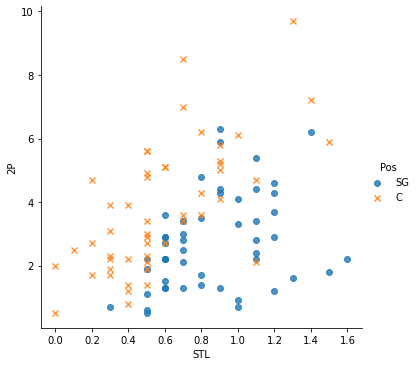

In [12]:
sns.lmplot("STL", "2P", data=df, fit_reg=False, hue="Pos", markers=["o", "x"])

### (2) 손글씨 이미지
- 포터블 비트맵
    - PBM : 하나의 화소를 1bit로 표현
    - PGM : 하나의 화소를 1byte로 표현
    - PPM : 하나의 화소를 3byte로 표현(RGB)

- header
    - magic number
        - P1, P4 : PBM
        - P2, P5 : PGM
        - P3, P6 : PPM
    - width, height
    - 영상 데이터의 최대값

In [22]:
def load_csv(fname):
    labels = []
    images = []

    f = open(fname, "r")
    for line in f:
        cols = line.split(",")
        if len(cols) < 2:
            continue
        
        labels.append(int(cols.pop(0)))

        vals = list(map(lambda n : int(n)/256, cols))
        images.append(vals)

    f.close()

    return {"y":labels, "X":images}



In [23]:
data = load_csv("/content/drive/My Drive/Colab Notebooks/Data/의사결정나무/mnist/train.csv")
test = load_csv("/content/drive/My Drive/Colab Notebooks/Data/의사결정나무/mnist/t10k.csv")

In [24]:
print(test["X"][2])
print(test["y"][2])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1484375, 0.9921875, 0.42578125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.33984375, 0.984375, 0.3203125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.52734375, 0.94140625, 0.0, 0.0, 0.0, 0.0

In [25]:
model = SVC().fit(data["X"], data["y"])

In [26]:
preds = model.predict(test["X"])

In [28]:
acc = accuracy_score(test["y"], preds)
print("정확도 :", acc)

정확도 : 0.9560878243512974


In [29]:
print(classification_report(test["y"], preds))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        42
           1       1.00      1.00      1.00        67
           2       0.98      0.96      0.97        55
           3       0.93      0.91      0.92        46
           4       0.93      0.98      0.96        55
           5       0.92      0.94      0.93        50
           6       0.98      0.93      0.95        43
           7       0.94      0.96      0.95        49
           8       0.93      0.97      0.95        40
           9       1.00      0.91      0.95        54

    accuracy                           0.96       501
   macro avg       0.95      0.95      0.95       501
weighted avg       0.96      0.96      0.96       501



In [30]:
pred1 = model.predict([test["X"][220]])
pred1

array([7])

In [31]:
test["y"][220]

7

In [36]:
input_form = """
<table>
<td style="border-style: none;">
<div style="border: solid 2px #666; width: 143px; height: 144px;">
<canvas width="140" height="140"></canvas>
</div></td>
<td style="border-style: none;">
<button onclick="clear_value()">Clear</button>
</td>
</table>
"""

javascript = """
<script type="text/Javascript">
    var pixels = [];
    for (var i = 0; i < 28*28; i++) pixels[i] = 0
    var click = 0;
    var canvas = document.querySelector("canvas");
    canvas.addEventListener("mousemove", function(e){
        if (e.buttons == 1) {
            click = 1;
            canvas.getContext("2d").fillStyle = "rgb(0,0,0)";
            canvas.getContext("2d").fillRect(e.offsetX, e.offsetY, 8, 8);
            x = Math.floor(e.offsetY * 0.2)
            y = Math.floor(e.offsetX * 0.2) + 1
            for (var dy = 0; dy < 2; dy++){
                for (var dx = 0; dx < 2; dx++){
                    if ((x + dx < 28) && (y + dy < 28)){
                        pixels[(y+dy)+(x+dx)*28] = 1
                    }
                }
            }
        } else {
            if (click == 1) set_value()
            click = 0;
        }
    });
    
    function set_value(){
        var result = ""
        for (var i = 0; i < 28*28; i++) result += pixels[i] + ","
        var kernel = IPython.notebook.kernel;
        kernel.execute("image = [" + result + "]");
    }
    
    function clear_value(){
        canvas.getContext("2d").fillStyle = "rgb(255,255,255)";
        canvas.getContext("2d").fillRect(0, 0, 140, 140);
        for (var i = 0; i < 28*28; i++) pixels[i] = 0
    }
</script>
"""

In [41]:
from IPython.display import HTML

HTML(input_form + javascript)

In [44]:
print(image)

NameError: ignored

In [40]:
pred2 = model.predict([image])
pred2

NameError: ignored